In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras 
from sklearn.metrics import *
import warnings as wr
wr.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r'C:\Users\halde\OneDrive\Desktop\machine learning\PP\credit_card\creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data.shape

(284807, 31)

In [6]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

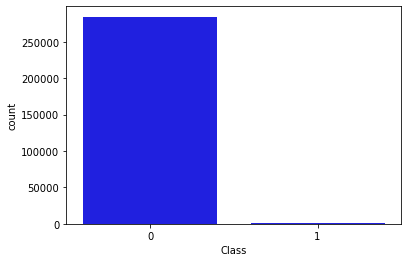

In [7]:
sns.countplot(data.Class,color='blue')
plt.show()

In [8]:
data_fraud=data[data.Class==1]
data_non_fraud=data[data.Class==0]

In [9]:
data_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [10]:
data_fraud.shape

(492, 31)

In [11]:
data_non_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
data_non_fraud.shape

(284315, 31)

In [13]:
##sampling the data points of non fraud to 6000 as to high 0s will make the model tillted towards non fraud case
non_fraud=data_non_fraud.sample(4920)

In [14]:
non_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
123829,77080.0,-0.465037,0.709234,1.536119,1.908854,-0.127236,0.044423,0.179020,0.042913,0.009377,...,0.157365,0.770826,0.124816,0.438877,-0.691425,-0.180645,0.010780,0.223077,1.00,0
91171,63341.0,1.126414,0.473616,0.538451,2.189902,0.216230,0.340401,0.039941,0.071012,-1.018681,...,-0.269238,-0.931942,0.034674,-0.541434,0.262015,-0.300813,-0.007315,0.020993,37.92,0
249508,154443.0,-11.717110,-12.528092,-7.731847,1.531842,-7.567084,3.288560,9.295277,-3.199744,-0.600683,...,-2.258446,0.201364,-8.384688,1.909181,-1.957805,-0.189683,5.986798,-4.950970,3097.98,0
49631,44140.0,1.520973,-1.025287,0.505252,-1.445473,-1.483645,-0.634502,-1.074960,-0.148601,-1.708550,...,-0.396280,-0.804719,0.109942,-0.172204,0.195079,-0.379809,0.040963,0.026216,21.60,0
75877,56290.0,-10.497954,-6.435535,-1.735567,0.513980,-1.982018,-0.334218,0.055912,0.412025,0.668418,...,-1.594300,0.528165,0.703551,0.296973,1.018900,-0.382363,-1.371742,-1.008514,196.43,0


In [15]:
balanced_data=data_fraud.append(non_fraud,ignore_index=True)

In [16]:
balanced_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [17]:
balanced_data.Class.value_counts()

0    4920
1     492
Name: Class, dtype: int64

In [18]:
x=balanced_data.iloc[:,:-1]
y=balanced_data.iloc[:,-1]

In [19]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00


In [20]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

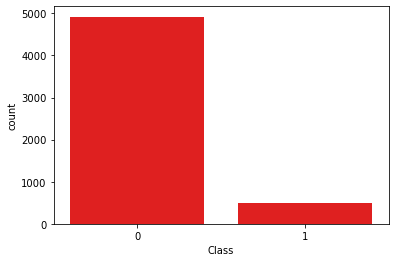

In [21]:
sns.countplot(y,color='red')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [24]:
x_train.shape

(3788, 30)

In [25]:
x_test.shape

(1624, 30)

In [26]:
## in order to go through the CNN algo we give a 3D structure to the dataset
x_train3=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test3=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam

In [28]:
## setting up the layers for CNN
##binary calssification problem so we use ReLU in inner layers and use Sigmoid in output layer
# 1 st layer
model=Sequential()
model.add(Conv1D(32,2,activation="relu",input_shape=(30,1)))
model.add(Dropout(0.1))

In [29]:
# 2nd layer
model.add(BatchNormalization())
model.add(Conv1D(64,2,activation='relu'))
model.add(Dropout(0.2))

In [30]:
#Flattening Layer
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

In [31]:
#final layer
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 batch_normalization (BatchN  (None, 29, 32)           128       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0         
                                                                 
 flatten (Flatten)           (None, 1792)              0         
                                                        

In [32]:
from tensorflow.keras import *
from sklearn import *

In [33]:
model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['acc'])

In [34]:
hist=model.fit(x_train3,y_train,epochs=40,validation_data=(x_test3,y_test),verbose=1)

Epoch 1/40
119/119 [==============================] - 1s 7ms/step - loss: 0.1082 - acc: 0.9725 - val_loss: 0.2716 - val_acc: 0.9803
Epoch 2/40
119/119 [==============================] - 1s 5ms/step - loss: 0.0755 - acc: 0.9826 - val_loss: 0.1230 - val_acc: 0.9840
Epoch 3/40
119/119 [==============================] - 1s 5ms/step - loss: 0.0739 - acc: 0.9857 - val_loss: 0.1094 - val_acc: 0.9815
Epoch 4/40
119/119 [==============================] - 1s 5ms/step - loss: 0.0642 - acc: 0.9842 - val_loss: 0.0706 - val_acc: 0.9821
Epoch 5/40
119/119 [==============================] - 1s 5ms/step - loss: 0.0658 - acc: 0.9857 - val_loss: 0.0584 - val_acc: 0.9840
Epoch 6/40
119/119 [==============================] - 1s 5ms/step - loss: 0.0544 - acc: 0.9871 - val_loss: 0.0608 - val_acc: 0.9834
Epoch 7/40
119/119 [==============================] - 1s 5ms/step - loss: 0.0594 - acc: 0.9850 - val_loss: 0.0573 - val_acc: 0.9834
Epoch 8/40
119/119 [==============================] - 1s 5ms/step - loss: 0.

In [35]:
y_pred=(model.predict(x_test) > 0.5).astype("int32")

51/51 [==============================] - 0s 1ms/step


In [36]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [37]:
y_test

2257    0
3165    0
1516    0
3532    0
5064    0
       ..
3892    0
4213    0
1814    0
2       1
1206    0
Name: Class, Length: 1624, dtype: int64

In [38]:
accuracy_score(y_test,y_pred)

0.9858374384236454

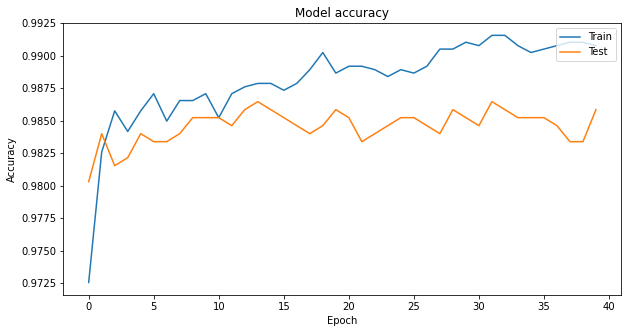

In [40]:
fig, ax1 = plt.subplots(figsize= (10, 5))
plt.plot(hist.history["acc"])
plt.plot(hist.history["val_acc"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper right")
plt.show()

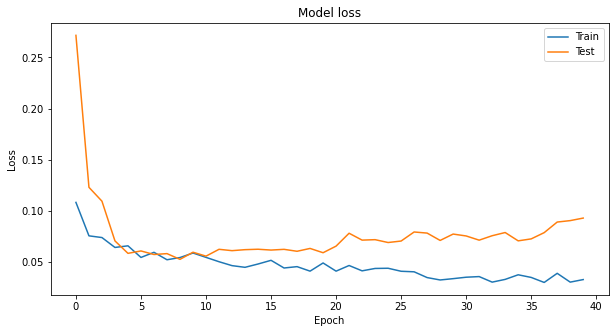

In [41]:
fig, ax1 = plt.subplots(figsize= (10, 5))
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper right")
plt.show()

In [42]:
model_accuracy_score  = accuracy_score(y_test,y_pred)
model_regr_precison_score  = precision_score(y_test,y_pred)
model_regr_recall_score    = recall_score(y_test,y_pred)
model_regr_f1_score        = f1_score(y_test,y_pred)
model_regr_MCC             = matthews_corrcoef(y_test,y_pred)

In [43]:
#score calculation with the confusion matrix for better visualization of category I and category II errors
print("Scores")
print("Accuracy-->",model_accuracy_score)
print("Precison-->",model_regr_precison_score)
print("Recall-->",model_regr_recall_score)
print("F1-->",model_regr_f1_score)
print("MCC-->",model_regr_MCC)
print(classification_report(y_test,y_pred))

Scores
Accuracy--> 0.9858374384236454
Precison--> 0.9632352941176471
Recall--> 0.8791946308724832
F1--> 0.9192982456140351
MCC--> 0.9126947362402414
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1475
           1       0.96      0.88      0.92       149

    accuracy                           0.99      1624
   macro avg       0.98      0.94      0.96      1624
weighted avg       0.99      0.99      0.99      1624



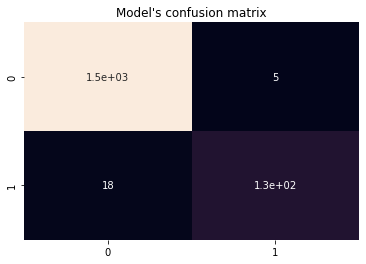

In [44]:
con_mat=confusion_matrix(y_test,y_pred)
sns.heatmap(con_mat,annot=True,cbar=False)
plt.title("Model's confusion matrix")
plt.show()